Import the necessary libraries and modules.

In [25]:
import pandas as pd
import csv
import ast
import matplotlib.pyplot as plt
import io

Change the Path variable to point to your CSV file

In [26]:
path = r"C:\Users\joacosta\Dev\Python\ORF5\Data\S04.csv"

In [27]:
raw_df = pd.read_csv(
    path,
    sep=";",
    header=None,
    engine="python",
    quoting=csv.QUOTE_NONE,
    skipinitialspace=True,
    on_bad_lines="skip",
    dtype=str
)

raw_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,"""250917 110405 027""","""N""","""SMC""","""10.158.244.100:7200""","""AWCS.Comm""","""""","""""","""22:45:29,656",MC01,54177,SQ 224,"->{event: ""AwcsConverterSendS04"", plcRecordNo: 0972, itemID: 14121U, indexNo: 0972, locationAWCS: ""S01aa "", barcodeAWCS: ""SD0002GOOD_001_v "", actualDestMCID: 0, requestedDestMCID: [0, -1, -1, -1, -1, -1], sortCode: [0, -1, -1, -1, -1, -1], requestedDestStatus: [""Used,FromAwcs,Attempted"", ""Unused"", ""Unused"", ""Unused"", ""Unused"", ""Unused""], comHost: ""AwcsConverterMcIf"", comMode: ""Send"", telegramType: ""S04""}<"""
1,"""250917 110405 267""","""N""","""SMC""","""10.158.244.100:7200""","""AWCS.Comm""","""""","""""","""22:45:29,895",MC01,54177,SQ 236,"->{event: ""AwcsConverterSendS04"", plcRecordNo: 1330, itemID: 14479U, indexNo: 1330, locationAWCS: ""S01aa "", barcodeAWCS: ""SD0003GOOD_001_v "", actualDestMCID: 16, requestedDestMCID: [16, -1, -1, -1, -1, -1], sortCode: [0, -1, -1, -1, -1, -1], requestedDestStatus: [""Used,FromAwcs,Attempted"", ""Unused"", ""Unused"", ""Unused"", ""Unused"", ""Unused""], comHost: ""AwcsConverterMcIf"", comMode: ""Send"", telegramType: ""S04""}<"""
2,"""250917 110405 505""","""N""","""SMC""","""10.158.244.100:7200""","""AWCS.Comm""","""""","""""","""22:45:30,133",MC01,54177,SQ 252,"->{event: ""AwcsConverterSendS04"", plcRecordNo: 1313, itemID: 14462U, indexNo: 1313, locationAWCS: ""S01aa "", barcodeAWCS: ""SD0009GOOD_001_v "", actualDestMCID: 0, requestedDestMCID: [0, -1, -1, -1, -1, -1], sortCode: [0, -1, -1, -1, -1, -1], requestedDestStatus: [""Used,FromAwcs,Attempted"", ""Unused"", ""Unused"", ""Unused"", ""Unused"", ""Unused""], comHost: ""AwcsConverterMcIf"", comMode: ""Send"", telegramType: ""S04""}<"""
3,"""250917 110405 745""","""N""","""SMC""","""10.158.244.100:7200""","""AWCS.Comm""","""""","""""","""22:45:30,374",MC01,54177,SQ 013,"->{event: ""AwcsConverterSendS04"", plcRecordNo: 1318, itemID: 14467U, indexNo: 1318, locationAWCS: ""S01aa "", barcodeAWCS: ""SD0006GOOD_001_v "", actualDestMCID: 2, requestedDestMCID: [2, -1, -1, -1, -1, -1], sortCode: [0, -1, -1, -1, -1, -1], requestedDestStatus: [""Used,FromAwcs,Attempted"", ""Unused"", ""Unused"", ""Unused"", ""Unused"", ""Unused""], comHost: ""AwcsConverterMcIf"", comMode: ""Send"", telegramType: ""S04""}<"""
4,"""250917 110406 031""","""N""","""SMC""","""10.158.244.100:7200""","""AWCS.Comm""","""""","""""","""22:45:30,625",MC01,54177,SQ 026,"->{event: ""AwcsConverterSendS04"", plcRecordNo: 1326, itemID: 14475U, indexNo: 1326, locationAWCS: ""S01aa "", barcodeAWCS: ""SD0009GOOD_001_v "", actualDestMCID: 4, requestedDestMCID: [4, -1, -1, -1, -1, -1], sortCode: [0, -1, -1, -1, -1, -1], requestedDestStatus: [""Used,FromAwcs,Attempted"", ""Unused"", ""Unused"", ""Unused"", ""Unused"", ""Unused""], comHost: ""AwcsConverterMcIf"", comMode: ""Send"", telegramType: ""S04""}<"""


In [28]:
df = raw_df.replace('"', '', regex=True)

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,250917 110405 027,N,SMC,10.158.244.100:7200,AWCS.Comm,,,"22:45:29,656",MC01,54177,SQ 224,"->{event: AwcsConverterSendS04, plcRecordNo: 0972, itemID: 14121U, indexNo: 0972, locationAWCS: S01aa , barcodeAWCS: SD0002GOOD_001_v , actualDestMCID: 0, requestedDestMCID: [0, -1, -1, -1, -1, -1], sortCode: [0, -1, -1, -1, -1, -1], requestedDestStatus: [Used,FromAwcs,Attempted, Unused, Unused, Unused, Unused, Unused], comHost: AwcsConverterMcIf, comMode: Send, telegramType: S04}<"
1,250917 110405 267,N,SMC,10.158.244.100:7200,AWCS.Comm,,,"22:45:29,895",MC01,54177,SQ 236,"->{event: AwcsConverterSendS04, plcRecordNo: 1330, itemID: 14479U, indexNo: 1330, locationAWCS: S01aa , barcodeAWCS: SD0003GOOD_001_v , actualDestMCID: 16, requestedDestMCID: [16, -1, -1, -1, -1, -1], sortCode: [0, -1, -1, -1, -1, -1], requestedDestStatus: [Used,FromAwcs,Attempted, Unused, Unused, Unused, Unused, Unused], comHost: AwcsConverterMcIf, comMode: Send, telegramType: S04}<"
2,250917 110405 505,N,SMC,10.158.244.100:7200,AWCS.Comm,,,"22:45:30,133",MC01,54177,SQ 252,"->{event: AwcsConverterSendS04, plcRecordNo: 1313, itemID: 14462U, indexNo: 1313, locationAWCS: S01aa , barcodeAWCS: SD0009GOOD_001_v , actualDestMCID: 0, requestedDestMCID: [0, -1, -1, -1, -1, -1], sortCode: [0, -1, -1, -1, -1, -1], requestedDestStatus: [Used,FromAwcs,Attempted, Unused, Unused, Unused, Unused, Unused], comHost: AwcsConverterMcIf, comMode: Send, telegramType: S04}<"
3,250917 110405 745,N,SMC,10.158.244.100:7200,AWCS.Comm,,,"22:45:30,374",MC01,54177,SQ 013,"->{event: AwcsConverterSendS04, plcRecordNo: 1318, itemID: 14467U, indexNo: 1318, locationAWCS: S01aa , barcodeAWCS: SD0006GOOD_001_v , actualDestMCID: 2, requestedDestMCID: [2, -1, -1, -1, -1, -1], sortCode: [0, -1, -1, -1, -1, -1], requestedDestStatus: [Used,FromAwcs,Attempted, Unused, Unused, Unused, Unused, Unused], comHost: AwcsConverterMcIf, comMode: Send, telegramType: S04}<"
4,250917 110406 031,N,SMC,10.158.244.100:7200,AWCS.Comm,,,"22:45:30,625",MC01,54177,SQ 026,"->{event: AwcsConverterSendS04, plcRecordNo: 1326, itemID: 14475U, indexNo: 1326, locationAWCS: S01aa , barcodeAWCS: SD0009GOOD_001_v , actualDestMCID: 4, requestedDestMCID: [4, -1, -1, -1, -1, -1], sortCode: [0, -1, -1, -1, -1, -1], requestedDestStatus: [Used,FromAwcs,Attempted, Unused, Unused, Unused, Unused, Unused], comHost: AwcsConverterMcIf, comMode: Send, telegramType: S04}<"


In [29]:
# Rename original df columns
df.columns = [
    "eventDateTime", "flag", "systemName", "ipAddress", "sender", "unkown",
    "unkown_2", "sorterExitTime", "machineCode", "unitID", "sequenceNo",
    "rawMessage"
]

In [30]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 0)
pd.set_option('display.max_rows', None)

print(df.iloc[0,11])

->{event: AwcsConverterSendS04, plcRecordNo: 0972, itemID: 14121U, indexNo: 0972, locationAWCS: S01aa          , barcodeAWCS: SD0002GOOD_001_v                    , actualDestMCID: 0, requestedDestMCID: [0, -1, -1, -1, -1, -1], sortCode: [0, -1, -1, -1, -1, -1], requestedDestStatus: [Used,FromAwcs,Attempted, Unused, Unused, Unused, Unused, Unused], comHost: AwcsConverterMcIf, comMode: Send, telegramType: S04}<


In [31]:
df.head(1)

,eventDateTime,flag,systemName,ipAddress,sender,unkown,unkown_2,sorterExitTime,machineCode,unitID,sequenceNo,rawMessage
0,250917 110405 027,N,SMC,10.158.244.100:7200,AWCS.Comm,,,"22:45:29,656",MC01,54177,SQ 224,"->{event: AwcsConverterSendS04, plcRecordNo: 0972, itemID: 14121U, indexNo: 0972, locationAWCS: S01aa , barcodeAWCS: SD0002GOOD_001_v , actualDestMCID: 0, requestedDestMCID: [0, -1, -1, -1, -1, -1], sortCode: [0, -1, -1, -1, -1, -1], requestedDestStatus: [Used,FromAwcs,Attempted, Unused, Unused, Unused, Unused, Unused], comHost: AwcsConverterMcIf, comMode: Send, telegramType: S04}<"


In [32]:
df["rawMessage"] = df["rawMessage"].str.removeprefix("->{").str.removesuffix("}<")
print(df.iloc[0,11])

event: AwcsConverterSendS04, plcRecordNo: 0972, itemID: 14121U, indexNo: 0972, locationAWCS: S01aa          , barcodeAWCS: SD0002GOOD_001_v                    , actualDestMCID: 0, requestedDestMCID: [0, -1, -1, -1, -1, -1], sortCode: [0, -1, -1, -1, -1, -1], requestedDestStatus: [Used,FromAwcs,Attempted, Unused, Unused, Unused, Unused, Unused], comHost: AwcsConverterMcIf, comMode: Send, telegramType: S04


In [33]:
def split_key_values(text):
    parts = []
    buf = ""
    inside_brackets = 0
    
    for ch in text:
        if ch == "[":
            inside_brackets += 1
        elif ch == "]":
            inside_brackets -= 1
        
        if ch == "," and inside_brackets == 0:
            parts.append(buf.strip())
            buf = ""
        else:
            buf += ch
    if buf:
        parts.append(buf.strip())
    return parts

def parse_row(text):
    items = split_key_values(text)
    d = {}
    for item in items:
        if ":" in item:
            k, v = item.split(":", 1)
            d[k.strip()] = v.strip()
    return d

df_expanded = df["rawMessage"].apply(parse_row).apply(pd.Series)

df_expanded.head()


,event,plcRecordNo,itemID,indexNo,locationAWCS,barcodeAWCS,actualDestMCID,requestedDestMCID,sortCode,requestedDestStatus,comHost,comMode,telegramType
0,AwcsConverterSendS04,0972,14121U,0972,S01aa,SD0002GOOD_001_v,0,"[0, -1, -1, -1, -1, -1]","[0, -1, -1, -1, -1, -1]","[Used,FromAwcs,Attempted, Unused, Unused, Unused, Unused, Unused]",AwcsConverterMcIf,Send,S04
1,AwcsConverterSendS04,1330,14479U,1330,S01aa,SD0003GOOD_001_v,16,"[16, -1, -1, -1, -1, -1]","[0, -1, -1, -1, -1, -1]","[Used,FromAwcs,Attempted, Unused, Unused, Unused, Unused, Unused]",AwcsConverterMcIf,Send,S04
2,AwcsConverterSendS04,1313,14462U,1313,S01aa,SD0009GOOD_001_v,0,"[0, -1, -1, -1, -1, -1]","[0, -1, -1, -1, -1, -1]","[Used,FromAwcs,Attempted, Unused, Unused, Unused, Unused, Unused]",AwcsConverterMcIf,Send,S04
3,AwcsConverterSendS04,1318,14467U,1318,S01aa,SD0006GOOD_001_v,2,"[2, -1, -1, -1, -1, -1]","[0, -1, -1, -1, -1, -1]","[Used,FromAwcs,Attempted, Unused, Unused, Unused, Unused, Unused]",AwcsConverterMcIf,Send,S04
4,AwcsConverterSendS04,1326,14475U,1326,S01aa,SD0009GOOD_001_v,4,"[4, -1, -1, -1, -1, -1]","[0, -1, -1, -1, -1, -1]","[Used,FromAwcs,Attempted, Unused, Unused, Unused, Unused, Unused]",AwcsConverterMcIf,Send,S04


In [34]:
# Function to parse array-like strings and return the first element
def first_element(val):
    if isinstance(val, str) and val.startswith("[") and val.endswith("]"):
        try:
            # Try to parse safely into Python list
            parsed = ast.literal_eval(val)
            if isinstance(parsed, list) and parsed:
                return parsed[0]
        except:
            # If literal_eval fails (e.g. strings without quotes like [Used,FromAwcs])
            parts = [x.strip() for x in val.strip("[]").split(",")]
            return parts[0] if parts else val
    return val

# Apply to your target columns
for col in ["requestedDestMCID", "sortCode", "requestedDestStatus"]:
    df_expanded[col] = df_expanded[col].apply(first_element)

df_expanded.head()


,event,plcRecordNo,itemID,indexNo,locationAWCS,barcodeAWCS,actualDestMCID,requestedDestMCID,sortCode,requestedDestStatus,comHost,comMode,telegramType
0,AwcsConverterSendS04,0972,14121U,0972,S01aa,SD0002GOOD_001_v,0,0,0,Used,AwcsConverterMcIf,Send,S04
1,AwcsConverterSendS04,1330,14479U,1330,S01aa,SD0003GOOD_001_v,16,16,0,Used,AwcsConverterMcIf,Send,S04
2,AwcsConverterSendS04,1313,14462U,1313,S01aa,SD0009GOOD_001_v,0,0,0,Used,AwcsConverterMcIf,Send,S04
3,AwcsConverterSendS04,1318,14467U,1318,S01aa,SD0006GOOD_001_v,2,2,0,Used,AwcsConverterMcIf,Send,S04
4,AwcsConverterSendS04,1326,14475U,1326,S01aa,SD0009GOOD_001_v,4,4,0,Used,AwcsConverterMcIf,Send,S04


In [35]:
# Drop the old structured column
df_clean = df.drop(columns=["rawMessage"])

# Merge with expanded dataframe
final_df = pd.concat([df_clean, df_expanded], axis=1)

final_df.head(10)

,eventDateTime,flag,systemName,ipAddress,sender,unkown,unkown_2,sorterExitTime,machineCode,unitID,...,indexNo,locationAWCS,barcodeAWCS,actualDestMCID,requestedDestMCID,sortCode,requestedDestStatus,comHost,comMode,telegramType
0,250917 110405 027,N,SMC,10.158.244.100:7200,AWCS.Comm,,,"22:45:29,656",MC01,54177,...,0972,S01aa,SD0002GOOD_001_v,0,0,0,Used,AwcsConverterMcIf,Send,S04
1,250917 110405 267,N,SMC,10.158.244.100:7200,AWCS.Comm,,,"22:45:29,895",MC01,54177,...,1330,S01aa,SD0003GOOD_001_v,16,16,0,Used,AwcsConverterMcIf,Send,S04
2,250917 110405 505,N,SMC,10.158.244.100:7200,AWCS.Comm,,,"22:45:30,133",MC01,54177,...,1313,S01aa,SD0009GOOD_001_v,0,0,0,Used,AwcsConverterMcIf,Send,S04
3,250917 110405 745,N,SMC,10.158.244.100:7200,AWCS.Comm,,,"22:45:30,374",MC01,54177,...,1318,S01aa,SD0006GOOD_001_v,2,2,0,Used,AwcsConverterMcIf,Send,S04
4,250917 110406 031,N,SMC,10.158.244.100:7200,AWCS.Comm,,,"22:45:30,625",MC01,54177,...,1326,S01aa,SD0009GOOD_001_v,4,4,0,Used,AwcsConverterMcIf,Send,S04
5,250917 110406 520,N,SMC,10.158.244.100:7200,AWCS.Comm,,,"22:45:31,149",MC01,54177,...,1088,S01ab,SD0004GOOD_001_v,3002,3001,0,Used,AwcsConverterMcIf,Send,S04
6,250917 110406 706,N,SMC,10.158.244.100:7200,AWCS.Comm,,,"22:45:31,334",MC01,54177,...,1322,S01aa,SD0010GOOD_001_v,6,6,0,Used,AwcsConverterMcIf,Send,S04
7,250917 110406 960,N,SMC,10.158.244.100:7200,AWCS.Comm,,,"22:45:31,585",MC01,54177,...,1329,S01aa,SD0010GOOD_001_v,10,10,0,Used,AwcsConverterMcIf,Send,S04
8,250917 110407 460,N,SMC,10.158.244.100:7200,AWCS.Comm,,,"22:45:32,065",MC01,54177,...,1336,S01aa,SD0003GOOD_001_v,14,14,0,Used,AwcsConverterMcIf,Send,S04
9,250917 110407 693,N,SMC,10.158.244.100:7200,AWCS.Comm,,,"22:45:32,304",MC01,54177,...,1316,S01aa,SD0006GOOD_001_v,16,16,0,Used,AwcsConverterMcIf,Send,S04


In [36]:
final_df.shape

(5911, 24)

In [37]:
final_df.nunique()

eventDateTime          5893
flag                      1
systemName                1
ipAddress                 1
sender                    1
unkown                    1
unkown_2                  1
sorterExitTime         5909
machineCode               1
unitID                    1
sequenceNo              256
event                     1
plcRecordNo            1999
itemID                 5040
indexNo                1999
locationAWCS              2
barcodeAWCS              13
actualDestMCID           13
requestedDestMCID        13
sortCode                  6
requestedDestStatus       2
comHost                   1
comMode                   1
telegramType              1
dtype: int64

In [38]:
# Get list of columns with only 1 unique value
cols_to_drop = final_df.columns[final_df.nunique() == 1].tolist()

print("Columns to drop:", cols_to_drop)

df_reduced = final_df.drop(columns=cols_to_drop)

print("Remaining columns:", df_reduced.columns.tolist())
df_reduced.head()


Columns to drop: ['flag', 'systemName', 'ipAddress', 'sender', 'unkown', 'unkown_2', 'machineCode', 'unitID', 'event', 'comHost', 'comMode', 'telegramType']
Remaining columns: ['eventDateTime', 'sorterExitTime', 'sequenceNo', 'plcRecordNo', 'itemID', 'indexNo', 'locationAWCS', 'barcodeAWCS', 'actualDestMCID', 'requestedDestMCID', 'sortCode', 'requestedDestStatus']


,eventDateTime,sorterExitTime,sequenceNo,plcRecordNo,itemID,indexNo,locationAWCS,barcodeAWCS,actualDestMCID,requestedDestMCID,sortCode,requestedDestStatus
0,250917 110405 027,"22:45:29,656",SQ 224,0972,14121U,0972,S01aa,SD0002GOOD_001_v,0,0,0,Used
1,250917 110405 267,"22:45:29,895",SQ 236,1330,14479U,1330,S01aa,SD0003GOOD_001_v,16,16,0,Used
2,250917 110405 505,"22:45:30,133",SQ 252,1313,14462U,1313,S01aa,SD0009GOOD_001_v,0,0,0,Used
3,250917 110405 745,"22:45:30,374",SQ 013,1318,14467U,1318,S01aa,SD0006GOOD_001_v,2,2,0,Used
4,250917 110406 031,"22:45:30,625",SQ 026,1326,14475U,1326,S01aa,SD0009GOOD_001_v,4,4,0,Used


In [39]:
# Dictionary for mapping sort codes
sort_code_map = {
    0: "Success",
    1: "Unknown",
    2: "Unexpected_Container",
    3: "Tracking_Error",
    4: "Gap_Error",
    5: "Destination_Full",
    6: "Destination_Non_Operational",
    7: "Invalid_Destination",
    8: "No_Read",
    9: "No_Code",
    10: "Multi_Label",
    11: "<reserved>",
    12: "Destination_Disabled",
    13: "Throughput_Limit",
    14: "Failed_To_Divert",
    15: "<reserved>",
    16: "No_Destination_Received",
    17: "Lost_Container",
    18: "Dimension_Error",
    19: "Weight_Error",
    20: "Container_Utilization",
    21: "Unable_To_Divert",
    22: "Destination_Not_Attempted"
}
# Add a new column for description
df_reduced["sortReason"] = df_reduced["sortCode"].map(sort_code_map)


In [40]:
df_reduced.head()

,eventDateTime,sorterExitTime,sequenceNo,plcRecordNo,itemID,indexNo,locationAWCS,barcodeAWCS,actualDestMCID,requestedDestMCID,sortCode,requestedDestStatus,sortReason
0,250917 110405 027,"22:45:29,656",SQ 224,0972,14121U,0972,S01aa,SD0002GOOD_001_v,0,0,0,Used,Success
1,250917 110405 267,"22:45:29,895",SQ 236,1330,14479U,1330,S01aa,SD0003GOOD_001_v,16,16,0,Used,Success
2,250917 110405 505,"22:45:30,133",SQ 252,1313,14462U,1313,S01aa,SD0009GOOD_001_v,0,0,0,Used,Success
3,250917 110405 745,"22:45:30,374",SQ 013,1318,14467U,1318,S01aa,SD0006GOOD_001_v,2,2,0,Used,Success
4,250917 110406 031,"22:45:30,625",SQ 026,1326,14475U,1326,S01aa,SD0009GOOD_001_v,4,4,0,Used,Success


In [41]:
# Count items by sortReason
sort_counts = df_reduced.groupby("sortReason").size().reset_index(name="count")

print(sort_counts)

             sortReason  count
0  Destination_Disabled    377
1      Destination_Full      9
2           Multi_Label      8
3               No_Read     99
4               Success   5375
5      Unable_To_Divert     43


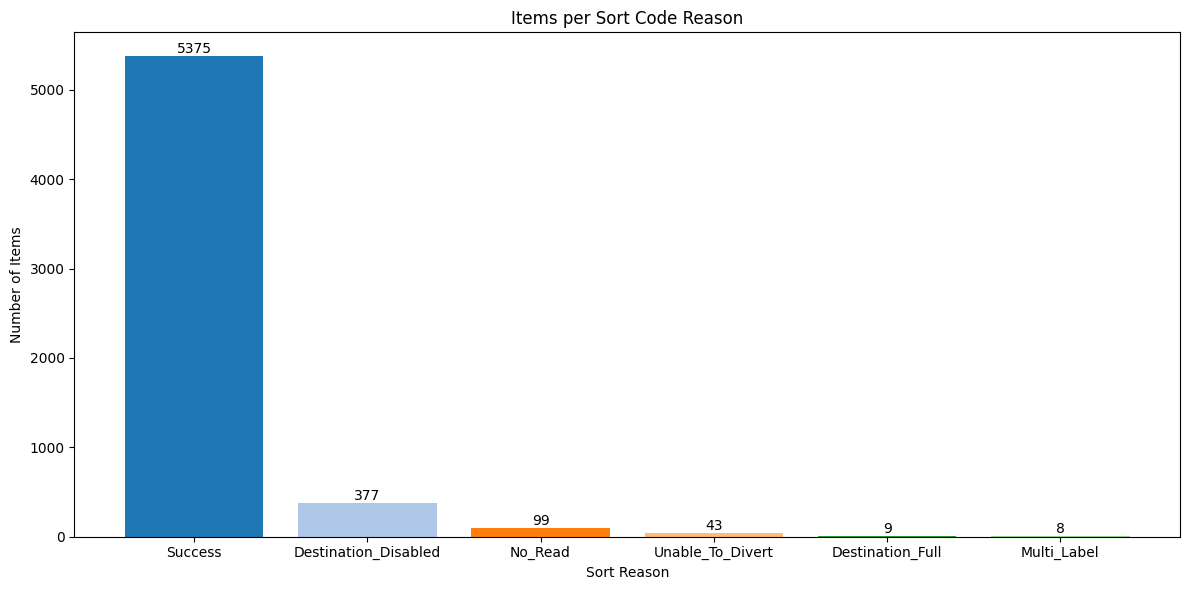

In [42]:
# Sort counts by frequency (optional, looks nicer)
sort_counts = sort_counts.sort_values("count", ascending=False)

plt.figure(figsize=(12,6))
bars = plt.bar(sort_counts["sortReason"], sort_counts["count"], color=plt.cm.tab20.colors) # type: ignore[attr-defined]

# Add value labels above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,   # X position (center of bar)
        height,                            # Y position (just above the bar)
        str(height),                       # Text = count value
        ha="center", va="bottom", fontsize=10
    )

plt.title("Items per Sort Code Reason")
plt.xlabel("Sort Reason")
plt.ylabel("Number of Items")
plt.tight_layout()
plt.show()

# MHE KPIs Analysis

In [43]:
# Map each reason to its category
defect_category_map = {
    # Scan Defect
    "Multi_Label": "Scan Defect",
    "No_Read": "Scan Defect",
    "No_Code": "Scan Defect",

    # MHE Defect
    "Failed_To_Divert": "MHE Defect",
    "Gap_Error": "MHE Defect",
    "Destination_Non_Operational": "MHE Defect",  # Lane_Non_Operational in doc
    "Lost_Container": "MHE Defect",
    "No_Destination_Received": "MHE Defect",
    "Unknown": "MHE Defect",   # Sort_Unknown in doc
    "Tracking_Error": "MHE Defect",
    "Unable_To_Divert": "MHE Defect",
}

# Create a new column for defect category
df_reduced["defectCategory"] = df_reduced["sortReason"].map(defect_category_map)


In [44]:
# Map defect category
df_reduced["defectCategory"] = df_reduced["sortReason"].map(defect_category_map)

# Total packages processed (all rows)
total_processed = len(df_reduced)

# Count defects only (exclude NaN)
defect_summary = (
    df_reduced["defectCategory"]
    .value_counts(dropna=True)
    .rename_axis("defectCategory")
    .reset_index(name="count")
)

# Percent over total processed
defect_summary["percentage"] = 100 * defect_summary["count"] / total_processed

# Optional: nicer formatting
defect_summary["percentage"] = defect_summary["percentage"].round(2)

print(defect_summary)


  defectCategory  count  percentage
0    Scan Defect    107        1.81
1     MHE Defect     43        0.73


In [45]:
# # Count values properly
# defect_summary = (
#     df_reduced["defectCategory"]
#     .value_counts(dropna=True)   # returns Series with category -> count
#     .reset_index()               # turns it into a DataFrame
# )

# # Rename correctly
# defect_summary.columns = ["defectCategory", "count"]

# # Ensure count is integer
# defect_summary["count"] = defect_summary["count"].astype(int)

# # Add percentage
# defect_summary["percentage"] = (
#     100 * defect_summary["count"] / defect_summary["count"].sum()
# )

# print(defect_summary)


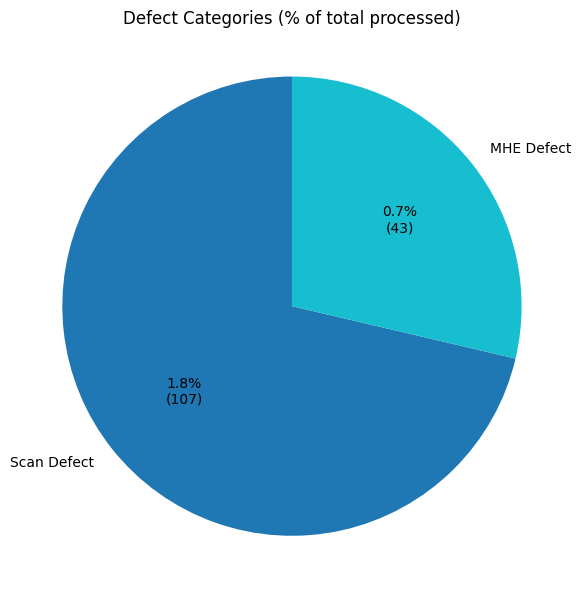

In [46]:
import numpy as np
import matplotlib.pyplot as plt

labels = defect_summary["defectCategory"].tolist()
counts = defect_summary["count"].to_numpy()

total_defects = counts.sum()
total_processed = len(df_reduced)  # <-- all rows (packages processed)

cmap = plt.get_cmap("tab10")
colors = [cmap(x) for x in np.linspace(0, 1, len(labels))]

def autopct_total(pct_defect_space):
    # recover the absolute count of the wedge
    count = int(round(pct_defect_space * total_defects / 100.0))
    pct_of_total = 100.0 * count / total_processed if total_processed else 0.0
    return f"{pct_of_total:.1f}%\n({count})"

plt.figure(figsize=(6, 6))
plt.pie(
    counts,
    labels=labels,
    autopct=autopct_total,      # labels show % of ALL processed
    startangle=90,
    colors=colors
)
plt.title("Defect Categories (% of total processed)")
plt.axis("equal")
plt.tight_layout()
plt.show()


# Write to excel file

In [47]:
# labels = defect_summary["defectCategory"].tolist()
# counts = defect_summary["count"].to_numpy()
# total = counts.sum()

# cmap = plt.get_cmap("tab10")
# colors = [cmap(x) for x in np.linspace(0, 1, len(labels))]

# fig, ax = plt.subplots(figsize=(6, 6))
# ax.pie(
#     counts,
#     labels=labels,
#     autopct=lambda p: f"{p:.1f}%\n({int(round(p*total/100))})",
#     startangle=90,
#     colors=colors
# )
# ax.set_title("Defect Categories: Scan vs MHE")
# ax.axis("equal")
# plt.tight_layout()

# buf = io.BytesIO()
# fig.savefig(buf, format="png", dpi=150, bbox_inches="tight")
# plt.close(fig)
# buf.seek(0)

# out_path = "analysis_output.xlsx"
# with pd.ExcelWriter(out_path, engine="xlsxwriter") as writer:
#     # Analysis_Results
#     pd.DataFrame().to_excel(writer, sheet_name="Analysis_Results", index=False)
#     wb = writer.book
#     ws = writer.sheets["Analysis_Results"]
#     bold = wb.add_format({"bold": True})    # type: ignore[attr-defined]

#     ws.write("A1", "Analysis Summary", bold)
#     ws.write("A3", "Total records (clean dataset):")
#     ws.write_number("B3", len(final_df))

#     # small table with the summary
#     defect_summary.to_excel(writer, sheet_name="Analysis_Results", startrow=5, startcol=0, index=False)
#     ws.set_column("A:A", 22)
#     ws.set_column("B:B", 12)

#     # insert the chart image
#     ws.insert_image("D3", "defect_pie.png", {"image_data": buf})

#     # Raw_Data
#     raw_df.to_excel(writer, sheet_name="Raw_Data", index=False)

#     # Clean_Data
#     final_df.to_excel(writer, sheet_name="Clean_Data", index=False)

# print(f"Saved: {out_path}")


In [48]:
# --- imports ---
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# =========================================================
# 1) Map defect category + compute summary (% over ALL rows)
#    Assumes: df_reduced, defect_category_map, raw_df, final_df exist
# =========================================================
df_reduced["defectCategory"] = df_reduced["sortReason"].map(defect_category_map)

total_processed = len(df_reduced)

# defects only (NaN == No Defect)
defect_summary = (
    df_reduced["defectCategory"]
    .value_counts(dropna=True)
    .rename_axis("defectCategory")
    .reset_index(name="count")
)

# % over ALL processed, not just defects
defect_summary["percentage"] = (
    100 * defect_summary["count"] / total_processed
).round(2)

# =========================================================
# 2) PIE (donut) over ALL processed with clean labels/legend
# =========================================================
labels = defect_summary["defectCategory"].tolist()
counts = defect_summary["count"].to_numpy()

no_defect_count = max(total_processed - counts.sum(), 0)
labels_all = labels + ["No Defect"]
counts_all = np.append(counts, no_defect_count)

cmap = plt.get_cmap("tab10")
colors = [cmap(x) for x in np.linspace(0, 1, len(labels_all))]

def autopct_if_big(p):
    # write % on wedge only if >= 2% to avoid clutter
    return f"{p:.1f}%" if p >= 2 else ""

fig1, ax1 = plt.subplots(figsize=(8, 6))  # wider to fit legend
wedges, texts, autotexts = ax1.pie(
    counts_all,
    startangle=90,
    colors=colors,
    autopct=autopct_if_big,
    pctdistance=0.75,
    textprops={"fontsize": 10},
    wedgeprops={"linewidth": 1, "edgecolor": "white"},
)

# Donut hole
ax1.add_artist(plt.Circle((0, 0), 0.55, fc="white"))
ax1.set_title("Package Outcomes (Defects vs No Defect)")
ax1.axis("equal")

# Legend on the right
total_all = counts_all.sum()
legend_labels = [
    f"{lbl} — {cnt} ({(cnt/total_all*100):.1f}%)"
    for lbl, cnt in zip(labels_all, counts_all)
]
ax1.legend(
    wedges, legend_labels,
    loc="center left",
    bbox_to_anchor=(1.02, 0.5),
    frameon=False,
    fontsize=10
)
plt.tight_layout()

# Save pie image to buffer for Excel
buf_pie = io.BytesIO()
fig1.savefig(buf_pie, format="png", dpi=150, bbox_inches="tight")
plt.close(fig1)
buf_pie.seek(0)

# =========================================================
# 3) sortReason counts + BAR chart
# =========================================================
sort_counts = (
    df_reduced["sortReason"]
    .value_counts(dropna=False)  # keep NaNs as their own entry
    .rename_axis("sortReason")
    .reset_index(name="count")
).sort_values("count", ascending=False).reset_index(drop=True)

fig2, ax2 = plt.subplots(figsize=(12, 6))
cmap2 = plt.get_cmap("tab20")
colors2 = [cmap2(i / max(1, len(sort_counts) - 1)) for i in range(len(sort_counts))]

bars = ax2.bar(
    sort_counts["sortReason"].astype(str).tolist(),
    sort_counts["count"].to_numpy(),
    color=colors2
)
for b in bars:
    h = b.get_height()
    ax2.text(b.get_x() + b.get_width()/2, h, str(int(h)), ha="center", va="bottom", fontsize=10)

ax2.set_title("Items per Sort Code Reason")
ax2.set_xlabel("Sort Reason")
ax2.set_ylabel("Number of Items")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Save bar image to buffer for Excel
buf_bar = io.BytesIO()
fig2.savefig(buf_bar, format="png", dpi=150, bbox_inches="tight")
plt.close(fig2)
buf_bar.seek(0)

# =========================================================
# 4) Write everything into Excel with generous spacing
# =========================================================
out_path = "analysis_output.xlsx"
with pd.ExcelWriter(out_path, engine="xlsxwriter") as writer:
    # Analysis_Results (create + header)
    pd.DataFrame().to_excel(writer, sheet_name="Analysis_Results", index=False)
    wb = writer.book
    ws = writer.sheets["Analysis_Results"]
    bold = wb.add_format({"bold": True})  # type: ignore[attr-defined]

    ws.write("A1", "Analysis Summary", bold)
    ws.write("A3", "Total records (clean dataset):")
    ws.write_number("B3", len(final_df))

    # Defect summary table
    ws.write("A5", "Defect Category Breakdown (percent over ALL processed)", bold)
    defect_summary.to_excel(writer, sheet_name="Analysis_Results", startrow=6, startcol=0, index=False)
    ws.set_column("A:A", 22)
    ws.set_column("B:B", 12)
    ws.set_column("C:C", 14)

    # Insert PIE at D3 with small offset
    ws.insert_image("D3", "defect_pie.png", {
        "image_data": buf_pie,
        "x_offset": 10, "y_offset": 5,
        # "x_scale": 0.95, "y_scale": 0.95,  # optional
    })

    # Sort table
    start_row_sort = 6 + len(defect_summary) + 3
    ws.write(start_row_sort - 1, 0, "Sort Code Reason Counts", bold)
    sort_counts.to_excel(writer, sheet_name="Analysis_Results", startrow=start_row_sort, startcol=0, index=False)
    ws.set_column("A:A", 30)
    ws.set_column("B:B", 14)

    # Insert BAR far to the right (column L = index 11) with offsets
    ws.insert_image(start_row_sort - 1, 11, "sort_reason_bar.png", {
        "image_data": buf_bar,
        "x_offset": 20, "y_offset": 5,
        # "x_scale": 0.9, "y_scale": 0.9,    # optional
    })

    # Raw/Clean data sheets
    raw_df.to_excel(writer, sheet_name="Raw_Data", index=False)
    final_df.to_excel(writer, sheet_name="Clean_Data", index=False)

print(f"Saved: {out_path}")


Saved: analysis_output.xlsx
